## Documentation


## What works 

Plotting of candidate solutions in 2D error surface slices, and using this as a means to validate GA candidate solutions, see below.

Presenting tabular data as pandas Data frames. see below.



## What does not yet work
The mean errors of the Genetic Algorithm have a downward trend, but they do not reliably decrease like the gradient descent alogorithm.
in order to circumvent this percieved flaw, two interventions have been used.


https://github.com/russelljjarvis/neuronunit/blob/dev/neuronunit/unit_test/pipe_entry_point.py#L86

lines 152-154 have 
https://github.com/russelljjarvis/BluePyOpt/blob/elitism/bluepyopt/deapext/algorithms.py#L155-156
Line 152-154 of BluePyOpt/bluepyopt/deapext/algorithms.py have been put in, to enforce that 


## Other problems
* Dropbox sync causes file reaad write problems during simulations over prolonged durations.
This can be circumvented by momentarily pausing syncing.

* This motivated me to stop convenient, but lazy reading and writing of attributes from disk, which could otherwise be stored
in the Data Transport Container. 
* I updated the file models/backends/neuron.py in two crucial places.



## What will work with more time

A docker container was made especially to run on a Spike server administratored by Renate.
The docker container builds
The container has an entrypoint which runs an exhaustive search simulation.
## The command: 
```
nohup docker run -v /home/rjarvis/git/neuronunit:/home/jovyan/neuronunit scidash/neuronunit-optimization```
is sufficient to run the file
```/home/rjarvis/git/neuronunit/neuronunit/unit_test/grid_entry_point.py``` with python.

Previously when running this file, it ran without error, however, because I forgot to mount a volume, pickle files generated in this session where not stored. I have since executed the command using a mounted volume, and I am now waiting for an output from the command.

It is expected that this will write four different files, with the prefix=grid_cell, and suffix=neurolex ID
At the location neuronunit/neuronunit/unit_test on the spike server.


This file runs without error
As confirmed by running 
```tail $HOME/nohup.out```, on the spike server, however the expected pickle files are not present there.

I expect this is because I forgot to mount a volume in the docker run command above.


In [1]:
import pickle
with open('dump_all_cells','rb') as f:
   pipe_results = pickle.load(f)

len(pipe_results['100201']['gen_vs_hof'])



5


# Assumptions about this code:
The NB was launched with a command that mounts two volumes inside a docker container. 
In the future invocation of this script will be simplified greatly. NU is from a specific fork and branch -b results https://github.com/russelljjarvis/neuronunit 
BluePyOpt is also from a specific fork and branch: -b elitism https://github.com/russelljjarvis/BluePyOpt

Below BASH code for Ubuntu host:

``` bash
cd ~/git/neuronunit; sudo docker run -it -v `pwd`:/home/jovyan/neuronunit -v ~/git/BluePyOpt:/home/jovyan/BluePyOpt neuronunit-optimization /bin/bash'
```

## Parallel Environment.
Parallelisation module: dask distributed.

In [2]:
import os
os.system('jupyter trust test_ga_versus_grid.ipynb'); #suppress the untrusted notebook warning.

#!pip install deap
import deap


In [3]:

import pprint
pprint.pprint(pipe_results)

{'100201': {'duration': 861.4938727999979,
            'gen_vs_hof': [<deap.tools.support.HallOfFame object at 0x7ff886aa52b0>,
                           [-71.640893897189969,
                            0.80082488140568486,
                            -3.0905634525584651e-09,
                            32.550690257394216,
                            0.0010114850170607945,
                            9.898982624526582e-05,
                            -56.742035136386185,
                            0.16830850267032699,
                            -72.184212396772949,
                            -49.433050469559873],
                           [-71.640893897189969,
                            0.80082488140568486,
                            -3.0905634525584651e-09,
                            32.550690257394216,
                            0.0010114850170607945,
                            9.898982624526582e-05,
                            -56.742035136386185,
                        

In [4]:
import pandas as pd
cell_names = list(pipe_results.keys())
param_names = list(pipe_results[list(pipe_results.keys())[0]]['pop'][0].dtc.attrs.keys())
df = pd.DataFrame(index=pipe_results.keys(),columns=param_names)

In [5]:
import pandas as pd
for index, val in enumerate(pipe_results.values()):
    if index == 0:
        sci = pd.DataFrame(list(val['pop'][0].dtc.scores.values())).T
    else:    
        sci = sci.append(pd.DataFrame(list(val['pop'][0].dtc.scores.values())).T)
        
sci

,0,1,2,3,4,5,6
0,0.640913,0.999048,0.942265,0.944181,0.677803,0.854345,0.481897
0,0.029110,0.508519,0.932727,0.515712,0.176675,0.785097,0.757380


In [6]:
import pandas as pd
for index, val in enumerate(pipe_results.values()):
    if index == 0:
        attrs = pd.DataFrame(list(val['pop'][0].dtc.attrs.values())).T
    else:    
        attrs = attrs.append(pd.DataFrame(list(val['pop'][0].dtc.attrs.values())).T)
        
attrs.columns = val['pop'][0].dtc.attrs.keys()    
#print(attrs)
attrs

,vr,a,b,vpeak,k,C,c,d,v0,vt
0,-51.433282,0.671062,-4.476644e-09,34.676729,0.000879,0.000100,-59.869110,0.124433,-47.314564,-41.909264
0,-69.706624,0.715175,-4.476644e-09,39.895902,0.001000,0.000102,-59.827371,0.124433,-50.947737,-41.713720


In [7]:
import pandas as pd


for index, val in enumerate(pipe_results.values()):
    if index == 0:
        #,columns=['Dice number','value'],index=[1,2,3,4])
        rheobase = pd.DataFrame([i.dtc.rheobase for i in val['pop']]).T
    else:    
        rheobase = rheobase.append(pd.DataFrame([i.dtc.rheobase for i in val['pop']]).T)
        
rheobase

names = [ str('generation: ')+str(i) for i in range(0,len(rheobase)) ]

rheobase


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
value,20.833333333333332 pA,113.60677083333333 pA,99.609375 pA,42.31770833333333 pA,20.833333333333332 pA,101.5625 pA,101.5625 pA,20.833333333333332 pA,113.60677083333333 pA,111.328125 pA,66.40625 pA,9.114583333333332 pA,128.09244791666666 pA,113.60677083333333 pA
value,196.61458333333331 pA,11.067708333333332 pA,18.717447916666664 pA,18.717447916666664 pA,11.067708333333332 pA,111.328125 pA,17.578125 pA,231.77083333333331 pA,16.927083333333332 pA,24.739583333333332 pA,30.110677083333332 pA,11.71875 pA,105.63151041666666 pA,17.578125 pA


In [8]:
import matplotlib
%matplotlib inline


################
# GA parameters:
about $10^{3}=30$ models will be made, excluding rheobase search.
################


# Choice of selection criteria is important. 
Here we use BluepyOpts IBEA, such that it can be compared to NSGA2.

https://link.springer.com/article/10.1007/s00500-005-0027-5




In [9]:
MU = 6; NGEN = 6; CXPB = 0.9
USE_CACHED_GA = False

################
# Grid search parameters:
$ 2^{10}=1024 $ models, will be made excluding rheobase search
################

An oppurtunity to improve grid search, by increasing resolution of search intervals given a first pass:

In [10]:
from neuronunit.plottools import plot_surface


# Below two error surface slices from the hypervolume are plotted.
The data that is plotted consists of the error as experienced by the GA.
Note: the GA performs an incomplete, and efficient sampling of the parameter space, and therefore sample points are irregularly spaced. Polygon interpolation is used to visualize error gradients. Existing plotting code from the package BluePyOpt has been extended for this purpose.
Light blue dots indicate local minima's of error experienced by the NSGA algrorithm.

<Figure size 432x288 with 0 Axes>

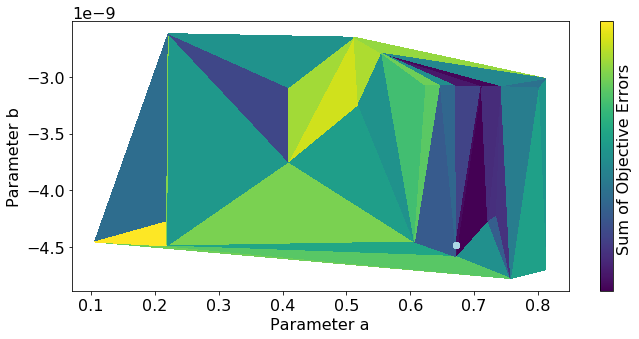

<Figure size 432x288 with 0 Axes>

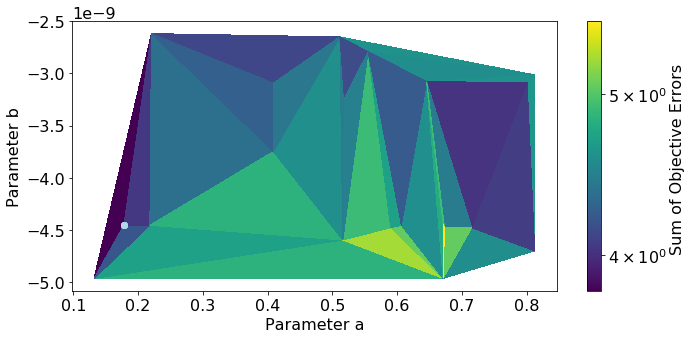

In [11]:
for index, val in enumerate(pipe_results.values()):
    td = val['td_py']
    history = val['history']

    plot_surface('a','b',td,history)

<Figure size 432x288 with 0 Axes>

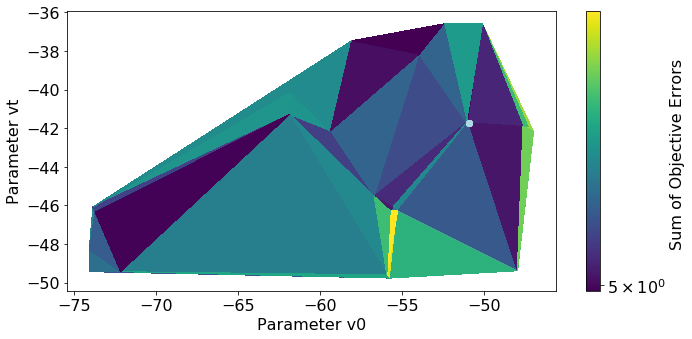

<Figure size 432x288 with 0 Axes>

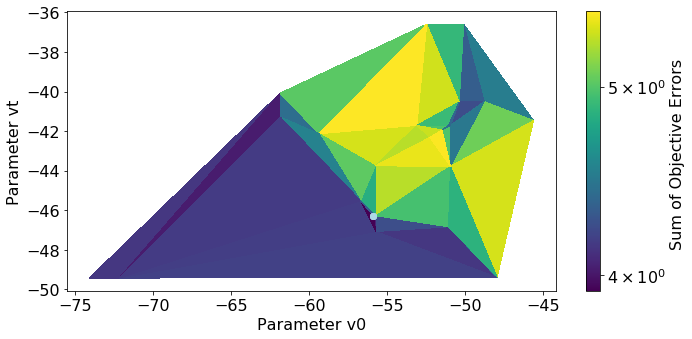

In [12]:

for index, val in enumerate(pipe_results.values()):
    td = val['td_py']
    history = val['history']

    plot_surface('v0','vt',td,history)
    

In [13]:
list(pipe_results.keys())

['100201', 'nifext_50']

NEURON
NEURON
NEURON
NEURON
dict_keys(['100201', 'nifext_50'])
[<neuronunit.optimization.data_transport_container.DataTC object at 0x7ff886c3c2b0>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7ff886c3c2b0>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7ff886aa5320>, <neuronunit.optimization.data_transport_container.DataTC object at 0x7ff886aa54a8>]
[0, 1, 2, 3]
[0, 1, 2, 3]


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


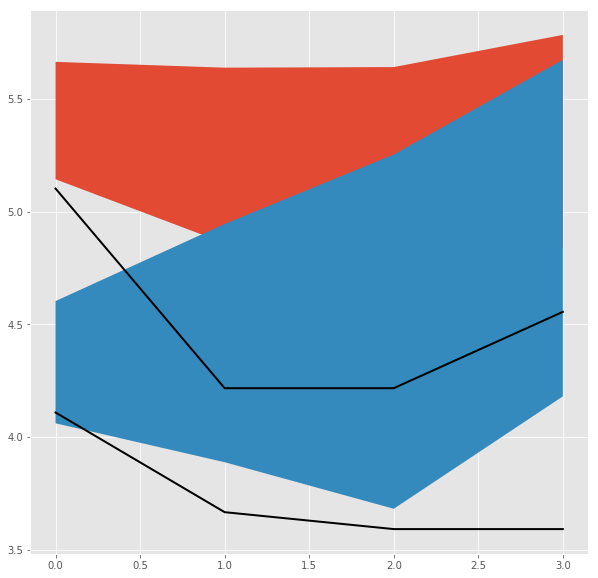

In [14]:

#print([f.scores for f in pipe_results['100201']['gen_vs_hof'][2:-1] ])
dtcs = list(filter(lambda d: hasattr(d,'dtc'), pipe_results['100201']['gen_vs_hof']))
dtcs = [d.dtc for d in dtcs ]
for d in dtcs:
    print(d.backend)

print(pipe_results.keys())

scores = list(filter(lambda dtc: hasattr(dtc,'score'), dtcs))

print(scores)
import pickle
with open('dump_all_cells','rb') as f:
   pipe_results = pickle.load(f)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')

for index, val in enumerate(pipe_results.values()):
    log = val['log']
    gen_numbers = [ i for i in range(0,len(log.select('gen'))) ]
    print(gen_numbers)
    hof = val['hof_py']
    mean = np.array([ np.sqrt(np.mean(np.square(i))) for i in log.select('avg')])
    std = np.array([ np.sqrt(np.mean(np.square(i))) for i in log.select('std')])
    minimum = np.array([ np.sqrt(np.mean(np.square(i))) for i in log.select('min')])
    best_line = np.array([ np.sqrt(np.mean(np.square(list(p.fitness.values))))  for p in hof])
    blg = [ best_line[h] for i, h in enumerate(gen_numbers) ]

    stdminus = mean - std
    stdplus = mean + std

    axes.plot(
        gen_numbers,
        minimum,
        color='black',
        linewidth=2,
        label='population average')
    axes.fill_between(gen_numbers, stdminus, stdplus)
    
   

In [15]:
for index, val in enumerate(pipe_results.values()):
    '''
    log = val['log']
    gen_numbers =[ i for i in range(0,len(log.select('gen'))) ]
    hof = val['hof_py']
    mean = np.array([ np.sqrt(np.mean(np.square(i))) for i in log.select('avg')])
    std = np.array([ np.sqrt(np.mean(np.square(i))) for i in log.select('std')])
    minimum = np.array([ np.sqrt(np.mean(np.square(i))) for i in log.select('min')])
    best_line = np.array([ np.sqrt(np.mean(np.square(list(p.fitness.values))))  for p in hof])
    blg = [ best_line[h] for i, h in enumerate(gen_numbers) ]

    '''
    print(val['gen_vs_hof'])

[<deap.tools.support.HallOfFame object at 0x7ff87ef2c780>, [-71.640893897189969, 0.80082488140568486, -3.0905634525584651e-09, 32.550690257394216, 0.0010114850170607945, 9.898982624526582e-05, -56.742035136386185, 0.16830850267032699, -72.184212396772949, -49.433050469559873], [-71.640893897189969, 0.80082488140568486, -3.0905634525584651e-09, 32.550690257394216, 0.0010114850170607945, 9.898982624526582e-05, -56.742035136386185, 0.16830850267032699, -72.184212396772949, -49.433050469559873], [-69.148967338864836, 0.60660077747244456, -4.4530474066557786e-09, 34.596034657377338, 0.00094083269921381939, 9.0429798626807885e-05, -55.812110121687134, 0.12894118574351265, -56.711548029281914, -45.520971457838755], [-74.3751976264235, 0.22058652453120517, -2.6205180496579908e-09, 33.357207377581076, 0.00079678153579057238, 9.8442336433770915e-05, -59.312676205926792, 0.11394505765075069, -61.863372190482835, -41.28553495863094]]
[<deap.tools.support.HallOfFame object at 0x7ff87ed29ba8>, [-71.

In [16]:

    
    #axes.plot([i for i in range(0,len(gvh))], gvh,'y--', linewidth=2,  label='grid search error')
    #axes.plot(gen_numbers, bl, 'go', linewidth=2, label='hall of fame error')

    #axes.plot(gen_numbers, stdminus, label='std variation lower limit')
    #axes.plot(gen_numbers, stdplus, label='std variation upper limit')

    #axes.set_xlim(np.min(gen_numbers) - 1, np.max(gen_numbers) + 1)
    #axes.set_xlabel('Generations')
    #axes.set_ylabel('Sum of objectives')
    #axes.legend()
    #fig.tight_layout()
    #fig.show()


# Comment on plot
The plot shows the mean error value of the population as the GA evolves it's population. The red interval at any instant is the standard deviation of the error. The fact that the mean GA error is able to have a net upwards trajectory, after experiencing a temporary downwards trajectory, demonstrates that the GA retains a drive to explore, and is resiliant against being stuck in a local minima. Also in the above plot population variance in error stays remarkably constant, in this way BluePyOpts selection criteria SELIBEA contrasts with DEAPs native selection strategy NSGA2

In [17]:
dtcpopg = [ dtc for dtc in dtcpopg if not None in (dtc.scores.values()) ]
dtcpopg = [ (dtc,sum(list(dtc.scores.values()))) for dtc in dtcpopg ]


sorted_grid = sorted(dtcpopg,key=lambda x:x[1])
sorted_grid = [dtc[0] for dtc in sorted_grid]
#print(sorted_grid)
mini = dtcpopg[0][1]
maxi = dtcpopg[-1][1]
minimagr = sorted_grid[0]
minimagr_dtc = sorted_grid[0]
minimagr_dtc_1 = sorted_grid[1]
minimagr_dtc_2 = sorted_grid[2]
from neuronunit.optimization.exhaustive_search import create_refined_grid
refined_grid = create_refined_grid(minimagr_dtc, minimagr_dtc_1,minimagr_dtc_2)


NameError: name 'dtcpopg' is not defined

In [ ]:
print(td)
def pop2dtc(pop1,DO,td):
    '''
    This function takes the DEAP population data type, and converts it to a more convenient
    data transport object, which can more readily be used in plotting functions.
    This a wasteful, recompute, which is in part necessitated because
    deaps pareto front object, only returns gene individual objects (elements of population)
    '''
    from neuronunit.optimization import nsga_parallel
    DO.td = td
    assert DO.td == td
    return_package = nsga_parallel.update_pop(pop1,td);
    dtc_pop = []
    for i,r in enumerate(return_package):
        dtc_pop.append(r[0])
        dtc_pop[i].error = None
        dtc_pop[i].error = np.sqrt(np.mean(np.square(list(pop1[i].fitness.values))))
    sorted_list  = sorted([(dtc,dtc.error) for dtc in dtc_pop],key=lambda x:x[1])
    dtc_pop = [dtc[0] for dtc in sorted_list]
    print(dtc_pop,sorted_list)
    return dtc_pop

DO.td = td
print(hof[0])
print(len(hof))
dtc_pop = pop2dtc(hof[0:-1],DO,td)

miniga = dtc_pop[0].error
maxiga = dtc_pop[-1].error
maximaga = dtc_pop[-1]
minimaga = dtc_pop[0]

CACHE_PF = False

In [ ]:

if CACHE_PF == False:
    h = list(history.genealogy_history.values())
    evaluated_history = []
    for i in h:
        if hasattr(i,'rheobase'):
            i.error = None
            i.error = np.sqrt(np.mean(np.square(list(i.fitness.values))))
            evaluated_history.append(i)
    sorted_list  = sorted([(i,i.error) for i in evaluated_history ],key=lambda x:x[1])

    with open('pf_dump.p','wb') as f:
       pickle.dump([ sorted_list, evaluated_history ],f)
else: 
     
     unpack = pickle.load(open('pf_dump.p','rb'))
     print(unpack)
     sorted_list_pf = unpack[0]
     pareto_dtc = unpack[1] 

minimaga_ind = sorted_list[0][0]
maximaga_ind = sorted_list[-1][0]
miniga = sorted_list[0][1]
maxiga = sorted_list[-1][1]


In [ ]:
import pandas as pd

print(miniga)
print(maxiga)
print(minimaga_ind.fitness.values)
print(maximaga_ind.fitness.values)
print(len(minimaga_ind.fitness.values))
print(dtcpopg[0][0].rheobase)
print(dtcpopg[0][0].scores)
print(sorted_list[-1][0].rheobase)
print(sorted_list[-1][0].fitness.values)



In [ ]:
def use_dtc_to_plotting(dtcpop,minimagr):
    from neuronunit.capabilities import spike_functions
    import matplotlib.pyplot as plt
    import numpy as np
    plt.clf()
    plt.style.use('ggplot')
    fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
    stored_min = []
    stored_max = []
    for dtc in dtcpop[1:-1]:
        plt.plot(dtc.tvec, dtc.vm0,linewidth=3.5, color='grey')
        stored_min.append(np.min(dtc.vm0))
        stored_max.append(np.max(dtc.vm0))
        
    from neuronunit.models.reduced import ReducedModel
    from neuronunit.optimization.get_neab import tests as T
    from neuronunit.optimization import get_neab
    from neuronunit.optimization import evaluate_as_module
    from neuronunit.optimization.evaluate_as_module import pre_format
    model = ReducedModel(get_neab.LEMS_MODEL_PATH,name=str('vanilla'),backend='NEURON')
    import neuron
    model._backend.reset_neuron(neuron)
    model.set_attrs(minimagr.attrs)
    model.rheobase = minimagr.rheobase['value']
    minimagr = pre_format(minimagr)
    parameter_list = list(minimagr.vtest.values())
    model.inject_square_current(parameter_list[0])
    model._backend.local_run()
    assert model.get_spike_count() == 1
    print(model.get_spike_count(),bool(model.get_spike_count() == 1))
    brute_best = list(model.results['vm'])

    plt.plot(dtcpop[0].tvec, brute_best,linewidth=1, color='blue',label='best candidate via grid')#+str(mini.scores))
    plt.plot(dtcpop[0].tvec,dtcpop[0].vm0,linewidth=1, color='red',label='best candidate via GA')#+str(miniga.scores))
    plt.legend()
    plt.ylabel('$V_{m}$ mV')
    plt.xlabel('ms')
    plt.show()
from neuronunit import plottools
from neuronunit.plottools import dtc_to_plotting

CACHE_PLOTTING = False
if CACHE_PLOTTING == False:
    dtc_pop = dview.map_sync(dtc_to_plotting,dtc_pop )
    with open('plotting_dump.p','wb') as f:
       pickle.dump(dtc_pop,f)
else: 
     dtc_pop  = pickle.load(open('plotting_dump.p','rb'))

use_dtc_to_plotting(dtc_pop,minimagr_dtc)
            

# Comment on plot
There is good agreement between traces produced by the best candidate found by Genetic Algorithm, and exhaustive grid search.

In [ ]:
import pandas as pd

print(dtc_pop[0].scores)
print(minimagr_dtc.scores)
print(sum(list(dtc_pop[0].scores.values())))
print(sum(list(minimagr_dtc.scores.values())))
miniga = sum(list(dtc_pop[0].scores.values()))
print(miniga)


# Quantize distance between minimimum error and maximum error.
This step will allow the GA's performance to be located within or below the range of error found by grid search.


In [ ]:
print(maxi)
print(mini)
print(miniga)
quantize_distance = list(np.linspace(mini,maxi,10))

# check that the nsga error is in the bottom 1/5th of the entire error range.
print('Report: ')
print("Success" if bool(miniga < quantize_distance[0]) else "Failure")
print("The nsga error %f is in the bottom 1/5th of the entire error range" % miniga)
print("Minimum = %f; 20th percentile = %f; Maximum = %f" % (mini,quantize_distance[0],maxi))

The code below reports on the differences between between attributes of best models found via grid versus attributes of best models found via GA search:


In [ ]:
import pandas as pd

from neuronunit.optimization import evaluate_as_module as eam
NSGAO = NSGA(0.85)
NSGAO.setnparams(nparams=nparams,provided_keys=provided_keys)
#td = eam.get_trans_dict(NSGAO.subset)
#print(td)
td = { v:k for k,v in enumerate(td) }
from neuronunit.optimization import model_parameters as modelp
mp = modelp.model_params
#minimaga = pareto_dtc[0]
for k,v in minimagr_dtc.attrs.items():
    #hvgrid = np.linspace(np.min(mp[k]),np.max(mp[k]),10)
    dimension_length = np.max(mp[k]) - np.min(mp[k])
    solution_distance_in_1D = np.abs(float(hof[0][td[k]]))-np.abs(float(v))
        
    #solution_distance_in_1D = np.abs(float(minimaga.attrs[k]))-np.abs(float(v))
    relative_distance = dimension_length/solution_distance_in_1D
    print('the difference between brute force candidates model parameters and the GA\'s model parameters:')
    print(float(hof[0][td[k]])-float(v),hof[0][td[k]],v,k)
    print('the relative distance scaled by the length of the parameter dimension of interest:')
    print(relative_distance)

    
    

In [ ]:

print('the difference between the bf error and the GA\'s error:')
print('grid search:')
from numpy import square, mean, sqrt
rmsg = sqrt(mean(square(list(minimagr_dtc.scores.values()))))
print(rmsg)
print('ga:')
rmsga = sqrt(mean(square(list(dtc_pop[0].scores.values()))))
print(rmsga)
print('Hall of Fame front')
print(sqrt(mean(square(list(hof[0].fitness.values)))))
print(miniga)


If any time is left over, may as well compute a more accurate grid, to better quantify GA performance in the future.

In [ ]:
from neuronunit.optimization import get_neab
#fi_basket = {'nlex_id':'NLXCELL:100201'}
neuron = {'nlex_id': 'nifext_50'} 

error_criterion, inh_observations = get_neab.get_neuron_criteria(fi_basket)
print(error_criterion)

from bluepyopt.deapext.optimisations import DEAPOptimisation

DO = DEAPOptimisation(error_criterion=error_criterion)
DO.setnparams(nparams = nparams, provided_keys = provided_keys)
pop, hof, log, history, td, gen_vs_hof = DO.run(offspring_size = MU, max_ngen = NGEN, cp_frequency=4,cp_filename='checkpointedGA.p')
with open('ga_dump.p','wb') as f:
   pickle.dump([pop, log, history, hof, td],f)

In [ ]:
# Layer V pyramidal cell
